In [ ]:
def print_first_5_lines(file_path):
    with open(file_path, 'r') as file:
        for _ in range(5):
            print(file.readline())

file_path = '/content/AB BANK GL.txt'
print_first_5_lines(file_path)


5001 GULSHAN BRANCH                               General Ledger Audit               21:19 05AUG21  Page   1  MISYS  HB229_2 P74ARPR

     IRR-UQASS.                                           GENERAL LEDGER                              P740357M    Phase C65 Unit BDU

SPOT RATE CONVERSION INTO Bangladesh Taka

Account number  Short name                    Amount  CCY           Equivalent  CT AT RC AC SC Deal reference

                                                                         (BDT)



# Remove unnecessary lines

In [ ]:
def remove_lines(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Keeping only lines that start with "500"
    filtered_lines = [line for line in lines if line.startswith("500")]

    with open(file_path, 'w') as file:
        file.writelines(filtered_lines)

# Replace 'path_to_file.txt' with the actual path of the file
file_path = '/content/AB BANK GL.txt'
remove_lines(file_path)

# After removed

In [ ]:
def print_first_5_lines(file_path):
    with open(file_path, 'r') as file:
        for _ in range(5):
            print(file.readline())

file_path = '/content/AB BANK GL.txt'
print_first_5_lines(file_path)


5001 GULSHAN BRANCH                               General Ledger Audit               21:19 05AUG21  Page   1  MISYS  HB229_2 P74ARPR

5001-901001-050 CASH ON HAND            1,902,476.00- BDT         1,902,476.00- IA YA BD ZA

5001901001050

5001-901002-050 CASH IN ATM             1,175,500.00- BDT         1,175,500.00- IA YA BD ZA

5001901002050



# Handling missing values

In [ ]:
import pandas as pd

def read_csv_to_dataframe(file_path):
    # Reading the CSV file into a DataFrame
    dataframe = pd.read_csv(file_path)
    return dataframe

csv_file_path = '/content/Team A.csv'  # Replace with your CSV file path
df = read_csv_to_dataframe(csv_file_path)

In [ ]:
df.head()

,AC,AC_NO,Short name,Amount,P/N,CCY,Equivalent(BDT),Unnamed: 7,CT,AT,RC,AC.1
0,5004-BEEIG2-151,5004070001979,STANDARD FINIS,"19,519,521.42",-,BDT,"19,519,521.42",-,CF,PJ,BD,G1
1,5004-BEELX5-151,5004070003339,S.FINIS-UNIT-2,"13,787,015.02",-,BDT,"13,787,015.02",-,CF,PJ,BD,G1
2,5002-BEEBFY-124,5002070004221,MAAN DAIRY LTD,"100,000,000.00",-,BDT,"100,000,000.00",-,CE,NB,BD,G0
3,5002-BEEBFY-125,5002070004224,MAAN DAIRY LTD,"70,000,000.00",-,BDT,"70,000,000.00",-,CE,NB,BD,G0
4,5002-BEEBFY-126,5002070004225,MAAN DAIRY LTD,"80,000,000.00",-,BDT,"80,000,000.00",-,CE,NB,BD,G0


In [ ]:
df = df.drop("AC.1", axis=1)


In [ ]:
df = df.drop("Unnamed: 7", axis=1)

In [ ]:
df.head(2000)

,AC,AC_NO,Short name,Amount,P/N,CCY,Equivalent(BDT),CT,AT,RC
0,5004-BEEIG2-151,5004070001979,STANDARD FINIS,"19,519,521.42",-,BDT,"19,519,521.42",CF,PJ,BD
1,5004-BEELX5-151,5004070003339,S.FINIS-UNIT-2,"13,787,015.02",-,BDT,"13,787,015.02",CF,PJ,BD
2,5002-BEEBFY-124,5002070004221,MAAN DAIRY LTD,"100,000,000.00",-,BDT,"100,000,000.00",CE,NB,BD
3,5002-BEEBFY-125,5002070004224,MAAN DAIRY LTD,"70,000,000.00",-,BDT,"70,000,000.00",CE,NB,BD
4,5002-BEEBFY-126,5002070004225,MAAN DAIRY LTD,"80,000,000.00",-,BDT,"80,000,000.00",CE,NB,BD
...,...,...,...,...,...,...,...,...,...,...
1995,5004-BEEDTC-004,5003020223570,AHASAN CHOWDHUR,994.17,NaN,BDT,994.17,EA,EC,BD
1996,5004-BEED4L-010,5003020203280,ASHRAFUL HAQUE,"76,981.58",NaN,BDT,"76,981.58",ES,ES,BD
1997,5004-BEED42-015,5003020152160,MD NURUL ANWAR,"97,426.39",NaN,BDT,"97,426.39",ES,ES,BD
1998,5004-BEEEMC-001,5004070000330,ARMAN FERDOUS,"3,897.07",NaN,BDT,"3,897.07",EA,EC,BD


In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

AC                    0
AC_NO                 0
Short name            2
Amount                2
P/N                4877
CCY                   1
Equivalent(BDT)       1
CT                    1
AT                    1
RC                    1
dtype: int64


In [ ]:
df.dropna(subset=["Short name"], inplace=True)
df.dropna(subset=["Amount"], inplace=True)
df.dropna(subset=["Equivalent(BDT)"], inplace=True)

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

AC                    0
AC_NO                 0
Short name            0
Amount                0
P/N                4872
CCY                   0
Equivalent(BDT)       0
CT                    0
AT                    0
RC                    0
dtype: int64


#Determine Individual and Non-individual AC

In [ ]:
import numpy as np
df['CT_Type'] = np.where(df['CT'].str.startswith('E'), 'individual', 'Non-Individual')
df.head(2000)

,AC,AC_NO,Short name,Amount,P/N,CCY,Equivalent(BDT),CT,AT,RC,CT_Type
0,5004-BEEIG2-151,5004070001979,STANDARD FINIS,"19,519,521.42",-,BDT,"19,519,521.42",CF,PJ,BD,Non-Individual
1,5004-BEELX5-151,5004070003339,S.FINIS-UNIT-2,"13,787,015.02",-,BDT,"13,787,015.02",CF,PJ,BD,Non-Individual
2,5002-BEEBFY-124,5002070004221,MAAN DAIRY LTD,"100,000,000.00",-,BDT,"100,000,000.00",CE,NB,BD,Non-Individual
3,5002-BEEBFY-125,5002070004224,MAAN DAIRY LTD,"70,000,000.00",-,BDT,"70,000,000.00",CE,NB,BD,Non-Individual
4,5002-BEEBFY-126,5002070004225,MAAN DAIRY LTD,"80,000,000.00",-,BDT,"80,000,000.00",CE,NB,BD,Non-Individual
...,...,...,...,...,...,...,...,...,...,...,...
1995,5004-BEEDTC-004,5003020223570,AHASAN CHOWDHUR,994.17,NaN,BDT,994.17,EA,EC,BD,individual
1996,5004-BEED4L-010,5003020203280,ASHRAFUL HAQUE,"76,981.58",NaN,BDT,"76,981.58",ES,ES,BD,individual
1997,5004-BEED42-015,5003020152160,MD NURUL ANWAR,"97,426.39",NaN,BDT,"97,426.39",ES,ES,BD,individual
1998,5004-BEEEMC-001,5004070000330,ARMAN FERDOUS,"3,897.07",NaN,BDT,"3,897.07",EA,EC,BD,individual


# Determine branch code

In [ ]:
df['B_code'] = df['AC_NO'].astype(str).str[:4]
df.head(2000)

,AC,AC_NO,Short name,Amount,P/N,CCY,Equivalent(BDT),Unnamed: 7,CT,AT,RC,AC.1,B_code
0,5004-BEEIG2-151,5004070001979,STANDARD FINIS,"19,519,521.42",-,BDT,"19,519,521.42",-,CF,PJ,BD,G1,5004
1,5004-BEELX5-151,5004070003339,S.FINIS-UNIT-2,"13,787,015.02",-,BDT,"13,787,015.02",-,CF,PJ,BD,G1,5004
2,5002-BEEBFY-124,5002070004221,MAAN DAIRY LTD,"100,000,000.00",-,BDT,"100,000,000.00",-,CE,NB,BD,G0,5002
3,5002-BEEBFY-125,5002070004224,MAAN DAIRY LTD,"70,000,000.00",-,BDT,"70,000,000.00",-,CE,NB,BD,G0,5002
4,5002-BEEBFY-126,5002070004225,MAAN DAIRY LTD,"80,000,000.00",-,BDT,"80,000,000.00",-,CE,NB,BD,G0,5002
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,5004-BEEDTC-004,5003020223570,AHASAN CHOWDHUR,994.17,NaN,BDT,994.17,NaN,EA,EC,BD,NaN,5003
1996,5004-BEED4L-010,5003020203280,ASHRAFUL HAQUE,"76,981.58",NaN,BDT,"76,981.58",NaN,ES,ES,BD,NaN,5003
1997,5004-BEED42-015,5003020152160,MD NURUL ANWAR,"97,426.39",NaN,BDT,"97,426.39",NaN,ES,ES,BD,NaN,5003
1998,5004-BEEEMC-001,5004070000330,ARMAN FERDOUS,"3,897.07",NaN,BDT,"3,897.07",NaN,EA,EC,BD,NaN,5004


#Assign branch name

In [ ]:
df['Branch_Name'] = np.where(df['UCIC'] == '5002', 'Motijheel',
                    np.where(df['UCIC'] == '5003', 'Chottogram',
                    np.where(df['UCIC'] == '5004', 'Gulshan',
                    np.where(df['UCIC'] == '5005', 'Sylhet',
                    np.where(df['UCIC'] == '5006', 'Uttara', 'Other')))))
df.head(2000)

,AC,AC_NO,Short name,Amount,P/N,CCY,Equivalent(BDT),CT,AT,RC,CT_Type,UCIC,Branch_Name
0,5004-BEEIG2-151,5004070001979,STANDARD FINIS,"19,519,521.42",-,BDT,"19,519,521.42",CF,PJ,BD,Non-Individual,5004,Gulshan
1,5004-BEELX5-151,5004070003339,S.FINIS-UNIT-2,"13,787,015.02",-,BDT,"13,787,015.02",CF,PJ,BD,Non-Individual,5004,Gulshan
2,5002-BEEBFY-124,5002070004221,MAAN DAIRY LTD,"100,000,000.00",-,BDT,"100,000,000.00",CE,NB,BD,Non-Individual,5002,Motijheel
3,5002-BEEBFY-125,5002070004224,MAAN DAIRY LTD,"70,000,000.00",-,BDT,"70,000,000.00",CE,NB,BD,Non-Individual,5002,Motijheel
4,5002-BEEBFY-126,5002070004225,MAAN DAIRY LTD,"80,000,000.00",-,BDT,"80,000,000.00",CE,NB,BD,Non-Individual,5002,Motijheel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,5004-BEEDTC-004,5003020223570,AHASAN CHOWDHUR,994.17,NaN,BDT,994.17,EA,EC,BD,individual,5003,Chottogram
1996,5004-BEED4L-010,5003020203280,ASHRAFUL HAQUE,"76,981.58",NaN,BDT,"76,981.58",ES,ES,BD,individual,5003,Chottogram
1997,5004-BEED42-015,5003020152160,MD NURUL ANWAR,"97,426.39",NaN,BDT,"97,426.39",ES,ES,BD,individual,5003,Chottogram
1998,5004-BEEEMC-001,5004070000330,ARMAN FERDOUS,"3,897.07",NaN,BDT,"3,897.07",EA,EC,BD,individual,5004,Gulshan


# Identify Loan & Deposit accounts

In [ ]:
df['AD/Dep'] = np.where(df['P/N'] == '-', 'loan', 'Deposit')
df.head(2000)

,AC,AC_NO,Short name,Amount,P/N,CCY,Equivalent(BDT),CT,AT,RC,CT_Type,UCIC,Branch_Name,AD/Dep
0,5004-BEEIG2-151,5004070001979,STANDARD FINIS,"19,519,521.42",-,BDT,"19,519,521.42",CF,PJ,BD,Non-Individual,5004,Gulshan,loan
1,5004-BEELX5-151,5004070003339,S.FINIS-UNIT-2,"13,787,015.02",-,BDT,"13,787,015.02",CF,PJ,BD,Non-Individual,5004,Gulshan,loan
2,5002-BEEBFY-124,5002070004221,MAAN DAIRY LTD,"100,000,000.00",-,BDT,"100,000,000.00",CE,NB,BD,Non-Individual,5002,Motijheel,loan
3,5002-BEEBFY-125,5002070004224,MAAN DAIRY LTD,"70,000,000.00",-,BDT,"70,000,000.00",CE,NB,BD,Non-Individual,5002,Motijheel,loan
4,5002-BEEBFY-126,5002070004225,MAAN DAIRY LTD,"80,000,000.00",-,BDT,"80,000,000.00",CE,NB,BD,Non-Individual,5002,Motijheel,loan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,5004-BEEDTC-004,5003020223570,AHASAN CHOWDHUR,994.17,NaN,BDT,994.17,EA,EC,BD,individual,5003,Chottogram,Deposit
1996,5004-BEED4L-010,5003020203280,ASHRAFUL HAQUE,"76,981.58",NaN,BDT,"76,981.58",ES,ES,BD,individual,5003,Chottogram,Deposit
1997,5004-BEED42-015,5003020152160,MD NURUL ANWAR,"97,426.39",NaN,BDT,"97,426.39",ES,ES,BD,individual,5003,Chottogram,Deposit
1998,5004-BEEEMC-001,5004070000330,ARMAN FERDOUS,"3,897.07",NaN,BDT,"3,897.07",EA,EC,BD,individual,5004,Gulshan,Deposit


In [ ]:
import seaborn as sns

In [ ]:
import pandas as pd

def read_excel_to_dataframe(file_path):
    # Reading the Excel file into a DataFrame
    dataframe = pd.read_excel(file_path)
    return dataframe

excel_file_path = '/content/Pre-processedTeam A.xlsx'  # Replace with your Excel file path
df = read_excel_to_dataframe(excel_file_path)

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.head()

,AC,B_Code,B-Name,UCIC,AC_NO,Short name,Amount,P/N,AD/Dep,CCY,Equivalent(BDT),CT,c_type,customer type,AT,Account Type,RC
0,5004-BEEIG2-151,5004,Gulshan,BEEIG2,5004070001979,STANDARD FINIS,19519521.42,-,Loan,BDT,19519521.42,CF,Non-Individual,CONVERTABLE TAKA ACCOUNT,PJ,IMPORT FINANCE-FATR,BD
1,5004-BEELX5-151,5004,Gulshan,BEELX5,5004070003339,S.FINIS-UNIT-2,13787015.02,-,Loan,BDT,13787015.02,CF,Non-Individual,CONVERTABLE TAKA ACCOUNT,PJ,IMPORT FINANCE-FATR,BD
2,5002-BEEBFY-124,5002,Motijheel,BEEBFY,5002070004221,MAAN DAIRY LTD,100000000.00,-,Loan,BDT,100000000.00,CE,Non-Individual,BUSINESS VALUE ACCOUNT (BVA),NB,SHORT TERM LOAN,BD
3,5002-BEEBFY-125,5002,Motijheel,BEEBFY,5002070004224,MAAN DAIRY LTD,70000000.00,-,Loan,BDT,70000000.00,CE,Non-Individual,BUSINESS VALUE ACCOUNT (BVA),NB,SHORT TERM LOAN,BD
4,5002-BEEBFY-126,5002,Motijheel,BEEBFY,5002070004225,MAAN DAIRY LTD,80000000.00,-,Loan,BDT,80000000.00,CE,Non-Individual,BUSINESS VALUE ACCOUNT (BVA),NB,SHORT TERM LOAN,BD


#Total Transaction

In [ ]:
total_sum = df['Equivalent(BDT)'].sum()
print("Total Transaction: ", total_sum,"Equivalent(BDT)")

Total Transaction:  10502136597.569998 Equivalent(BDT)


#Total Deposit and Loan in Equivalent(BDT)

In [ ]:
Deposit = df[df['AD/Dep'] == 'Deposit']['Equivalent(BDT)'].sum()
print("Total Deosit: ",Deposit,"Equivalent(BDT)")


print("Total Loan: ",total_sum-Deposit,"Equivalent(BDT)")

Total Deosit:  5289648765.95 Equivalent(BDT)
Total Loan:  5212487831.619998 Equivalent(BDT)


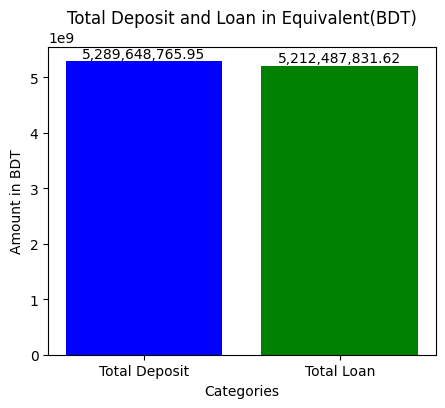

In [ ]:
import matplotlib.pyplot as plt

# Data
categories = ['Total Deposit', 'Total Loan']
amounts = [5289648765.95, 5212487831.62]

# Creating the bar chart
plt.figure(figsize=(5, 4))
plt.bar(categories, amounts, color=['blue', 'green'])

# Adding titles and labels
plt.title('Total Deposit and Loan in Equivalent(BDT)')
plt.ylabel('Amount in BDT')
plt.xlabel('Categories')

# Adding the numeric values on top of the bars
for i in range(len(amounts)):
    plt.text(i, amounts[i], f'{amounts[i]:,.2f}', ha='center', va='bottom')

# Show the plot
plt.show()


#Branch-wise Total Transactions

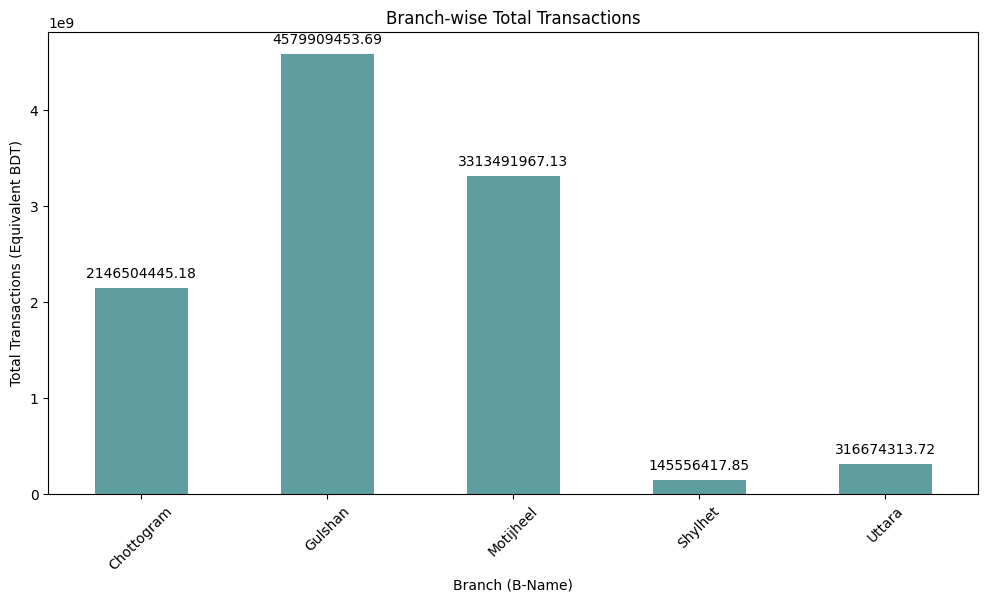

In [ ]:
# Aggregating transaction amounts by 'B-Name'
branch_wise_transactions = df.groupby('B-Name')['Equivalent(BDT)'].sum()

# Plotting branch-wise total transactions with values on each bar
plt.figure(figsize=(12, 6))
ax = branch_wise_transactions.plot(kind='bar', color='cadetblue')
plt.title('Branch-wise Total Transactions')
plt.xlabel('Branch (B-Name)')
plt.ylabel('Total Transactions (Equivalent BDT)')
plt.xticks(rotation=45)

# Adding value labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.show()

#Branch-wise Deposit and Loan Amounts

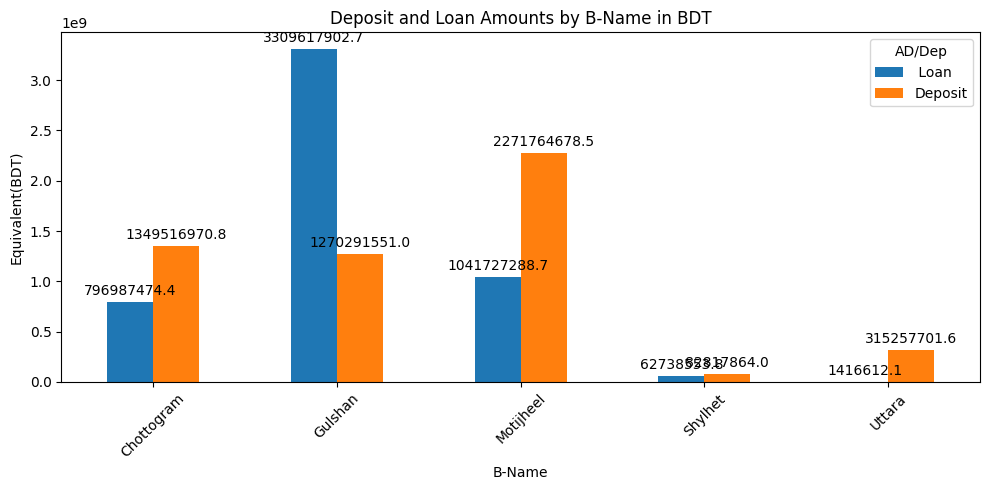

In [ ]:
# Filter relevant columns
relevant_data = df[['B-Name', 'AD/Dep', 'Equivalent(BDT)']]

# Group by 'B-Name' and 'AD/Dep' and sum the amounts
grouped_data = relevant_data.groupby(['B-Name', 'AD/Dep']).sum().reset_index()

# Pivot the table for plotting
pivot_table = grouped_data.pivot(index='B-Name', columns='AD/Dep', values='Equivalent(BDT)').fillna(0)

# Plotting
plt.figure(figsize=(10, 5))
ax = pivot_table.plot(kind='bar', stacked=False, ax=plt.gca())
plt.title('Deposit and Loan Amounts by B-Name in BDT')
plt.xlabel('B-Name')
plt.ylabel('Equivalent(BDT)')
plt.xticks(rotation=45)
plt.legend(title='AD/Dep')
plt.tight_layout()

# Adding value labels to each bar
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.1f'),
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center',
                xytext=(0, 8),
                textcoords='offset points')

plt.show()


In [ ]:
# Filtering the dataset for only deposit accounts
deposit_data_only = df[df['P/N'] == '-']
deposit_data_only.head()

#Top 10 Deposit Accounts

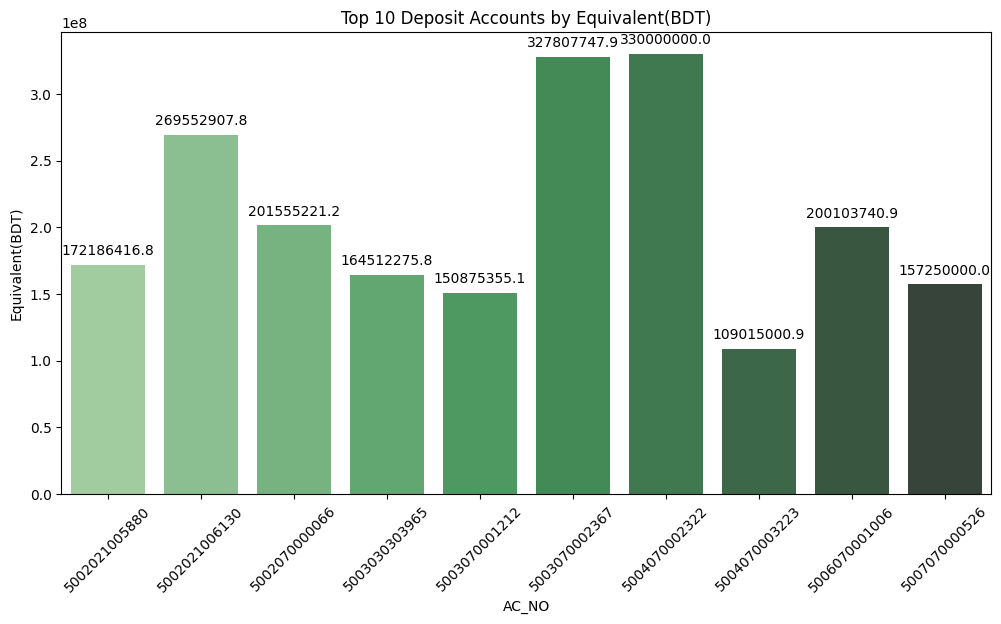

In [ ]:
import seaborn as sns
# Filtering the dataset for only deposit accounts
deposit_data_only = df[df['AD/Dep'] == 'Deposit']

# Finding the top 10 deposit accounts based on 'Equivalent(BDT)'
top_10_deposit_accounts = deposit_data_only.nlargest(10, 'Equivalent(BDT)')

# Plotting the top 10 deposit accounts with values on each bar
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='AC_NO', y='Equivalent(BDT)', data=top_10_deposit_accounts, palette="Greens_d")
plt.title('Top 10 Deposit Accounts by Equivalent(BDT)')
plt.xlabel('AC_NO')
plt.ylabel('Equivalent(BDT)')
plt.xticks(rotation=45)

# Adding value labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')
plt.show()

#Top 10 Loan Accounts

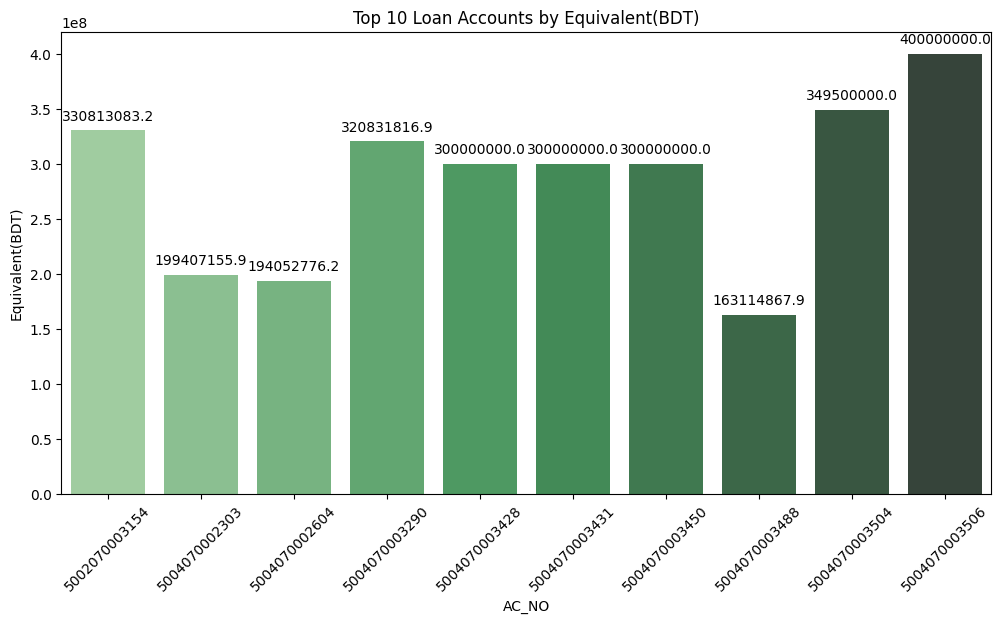

In [ ]:
# Filtering the dataset for only loan accounts
loan_data_only =  df[df['P/N'] == '-']

top_10_loan_accounts = loan_data_only.nlargest(10, 'Equivalent(BDT)')

# Plotting the top 10 deposit accounts with values on each bar
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='AC_NO', y='Equivalent(BDT)', data=top_10_loan_accounts, palette="Greens_d")
plt.title('Top 10 Loan Accounts by Equivalent(BDT)')
plt.xlabel('AC_NO')
plt.ylabel('Equivalent(BDT)')
plt.xticks(rotation=45)

# Adding value labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')
plt.show()


#Ratio of Non-Individual to Individual Accounts

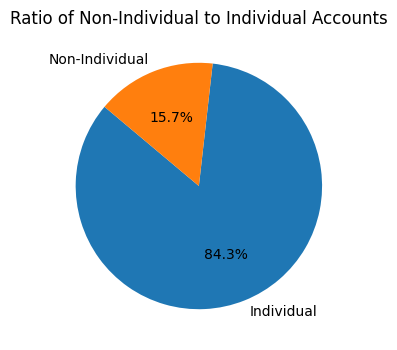

Individual        4357
Non-Individual     810
Name: c_type, dtype: int64


In [ ]:
# Counting Non-Individual and Individual accounts
account_type_counts = df['c_type'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(4,4))
plt.pie(account_type_counts, labels=account_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Ratio of Non-Individual to Individual Accounts')
plt.show()
print(account_type_counts)

#Distribution of Accounts per B-Name

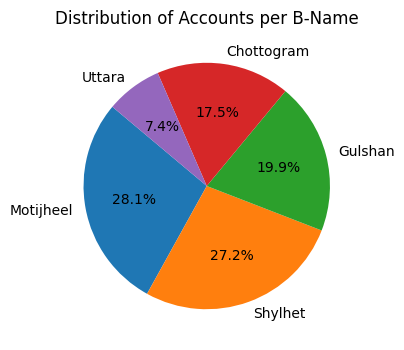

Motijheel     1450
Shylhet       1404
Gulshan       1026
Chottogram     906
Uttara         381
Name: B-Name, dtype: int64


In [ ]:
# Counting the number of accounts per 'B-Name'
b_name_counts = df['B-Name'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(4,4))
plt.pie(b_name_counts, labels=b_name_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Accounts per B-Name')
plt.show()

print(b_name_counts)

#Top 15 AT Types by Number of Accounts

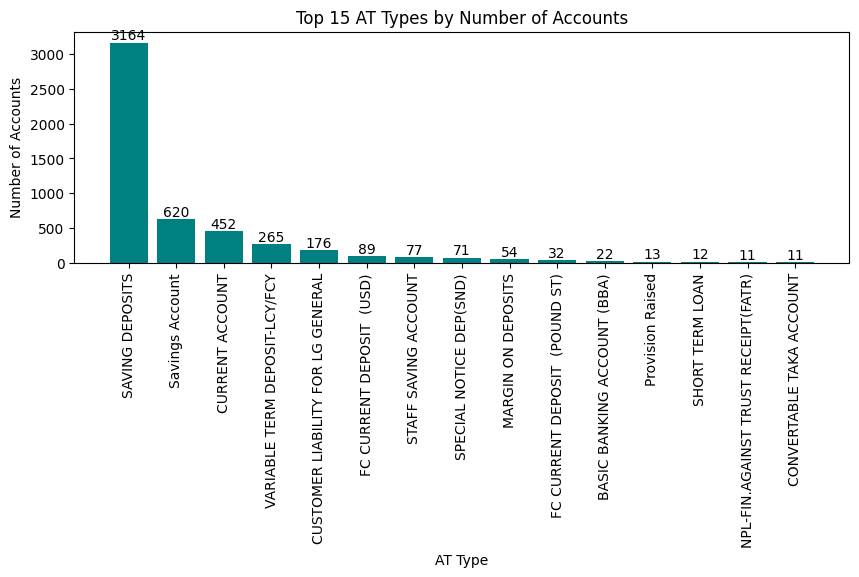

In [ ]:
# Counting the number of accounts per 'AT' type
at_type_counts = df['Account Type'].value_counts()

# Selecting the top 15 AT types
top_15_at_types = at_type_counts.head(15)

# Plotting the bar graph for the top 15 AT types with counts displayed
plt.figure(figsize=(10, 3))
bars = plt.bar(top_15_at_types.index, top_15_at_types.values, color='teal')

# Adding the count above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=10)

plt.title('Top 15 AT Types by Number of Accounts')
plt.xlabel('AT Type')
plt.ylabel('Number of Accounts')
plt.xticks(rotation=90)
plt.show()

#Top 5 Risk Countries

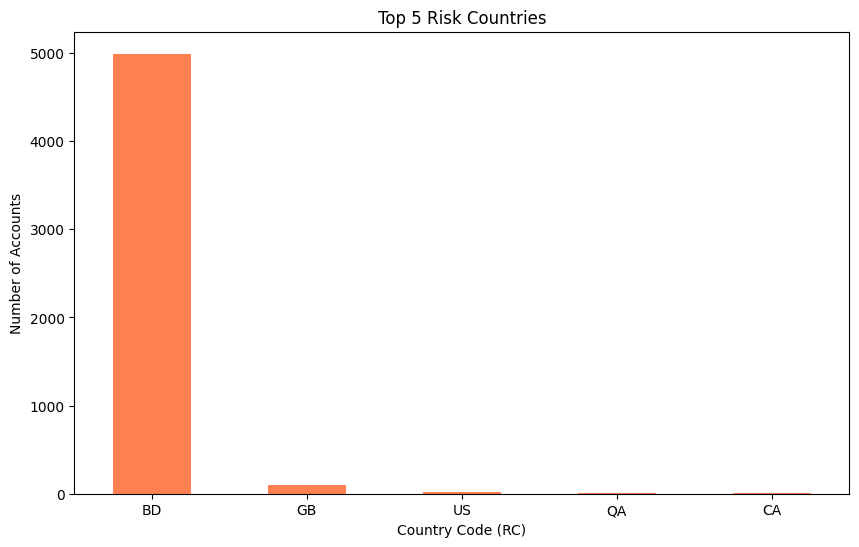

In [ ]:
rc_counts = df['RC'].value_counts()

# Selecting the top 5 risk countries
top_5_rc = rc_counts.head(5)

# Plotting the top 5 risk countries
plt.figure(figsize=(10, 6))
top_5_rc.plot(kind='bar', color='coral')
plt.title('Top 5 Risk Countries')
plt.xlabel('Country Code (RC)')
plt.ylabel('Number of Accounts')
plt.xticks(rotation=0)
plt.show()

#Impact factor

In [ ]:
def calculate_impact(row):
    if row['Equivalent(BDT)'] < 2000000:
        return 0
    elif row['Equivalent(BDT)'] >= 2000000:
        return 1


# Apply the function to the DataFrame
df['impact'] = df.apply(calculate_impact, axis=1)

# Now df has the new 'impact' column
print(df.head(2000))

#Apply K Means

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

# Prepare the data
X = df[['Amount', 'Equivalent(BDT)']]
y = df['impact']

# Standardizing the features (important for K-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=47)
clusters = kmeans.fit_predict(X_scaled)

# Create a DataFrame from clusters and impact
cluster_df = pd.DataFrame({'Cluster': clusters, 'Impact': y})

# Mapping clusters to impact labels based on majority class in each cluster
# This step might require some manual analysis to understand the best mapping
# Here's a simplistic approach:
cluster_to_impact = cluster_df.groupby('Cluster')['Impact'].agg(lambda x: x.value_counts().index[0]).to_dict()
mapped_clusters = [cluster_to_impact[cluster] for cluster in clusters]

# Confusion Matrix
conf_mat = confusion_matrix(y, mapped_clusters)

print("Confusion Matrix:")
print(conf_mat)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Confusion Matrix:
[[4878    0]
 [ 272   17]]


#Apply K Neighbors Classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Prepare the data
X = df[['Amount', 'Equivalent(BDT)']]
y = df['impact']

# Standardizing the features (important for distance-based algorithms like KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune this parameter

# Train the classifier
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

# Evaluate the classifier
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[968   0]
 [  1  65]]


In [ ]:
df['class'] = np.where(df['c_type'] == 'Non-Individual', 1, 0)

# Now df has the new 'class' column
print(df.head())

#Apply Logistic Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Preprocessing: Convert 'c_type' to numeric using one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Equivalent(BDT)']),
        ('cat', OneHotEncoder(), ['c_type'])
    ]
)

# Prepare the data
X = df[['c_type', 'Equivalent(BDT)']]
y = df['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with preprocessing and the logistic regression model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])

# Train the model
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[855   0]
 [  0 179]]
